<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>


</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users= pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Es muy pequeño el data frame, solo tiene 2 filas, no tiene datos nulos, todos sus datos son enteros y flotantes

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios

users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
372,1372,Patria,Kim,26,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-08,surf,NaN
464,1464,Burt,Burke,70,"Providence-Warwick, RI-MA MSA",2018-11-07,surf,NaN
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
322,1322,Tyler,Sweeney,22,"Fresno, CA MSA",2018-06-18,surf,NaN


Es un Data frame de 500 filas, tiene 8 columnas, sin embargo 466 datos ausentes en la columna churn_date, que necesitaran ser modificados, ademas de que las fechas estan en formato objeto, lo que indica que necesitan ser cambiadas a formato de fecha. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [8]:
users['churn_date']=pd.to_datetime(users['churn_date'])
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
230,1230,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,NaT
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaT
349,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT
376,1376,Mika,Williams,58,"Columbia, SC MSA",2018-04-16,ultimate,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
users['year']= users['reg_date'].dt.year
users['month']= users['reg_date'].dt.month
users['day']= users['reg_date'].dt.day
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018,8,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018,1,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018,5,23
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,2018,9,4
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,2018,2,20
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,2018,12,10
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2018,2,4


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas

calls.sample(5)

,id,user_id,call_date,duration
54603,1196_493,1196,2018-03-23,3.98
78098,1280_64,1280,2018-08-01,20.30
6507,1031_125,1031,2018-10-20,10.68
55327,1198_71,1198,2018-12-08,5.76
87209,1320_878,1320,2018-09-20,4.68


Es un Data Frame de 1377735 filas, que tiene 5 columnas, no tiene datos nulos, la columna call_date tiene los valores en objeto, lo cual deben de ser modificados a formato de fecha.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['day'] = calls['call_date'].dt.day
calls

,id,user_id,call_date,duration,year,month,day
0,1000_93,1000,2018-12-27,8.52,2018,12,27
1,1000_145,1000,2018-12-27,13.66,2018,12,27
2,1000_247,1000,2018-12-27,14.48,2018,12,27
3,1000_309,1000,2018-12-28,5.76,2018,12,28
4,1000_380,1000,2018-12-30,4.22,2018,12,30
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11,21
137731,1499_200,1499,2018-10-20,10.89,2018,10,20
137732,1499_201,1499,2018-09-21,8.12,2018,9,21
137733,1499_202,1499,2018-10-10,0.37,2018,10,10


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes

messages.sample(5)

,id,user_id,message_date
22377,1133_467,1133,2018-08-10
8600,1064_4,1064,2018-06-21
21107,1132_305,1132,2018-05-21
23466,1142_169,1142,2018-08-29
26199,1159_202,1159,2018-08-11


Es un Data Frame bastante grande de 76051 filas, esta compuesto por 3 columnas, se podrían extraer los años y realizar columnas con el año, el formato de message_date es de objeto y no de fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
messages['year']= messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages['day'] = messages['message_date'].dt.day
messages

,id,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(5)

,id,user_id,session_date,mb_used
84809,1396_135,1396,2018-11-23,936.83
57597,1261_38,1261,2018-07-15,175.04
22922,1106_124,1106,2018-08-21,277.31
54755,1247_170,1247,2018-12-07,333.07
9678,1050_98,1050,2018-04-06,0.00


Es un data frame de 104825 filas, tiene 5 columnas, las columnas no tienen datos nulos. el formato de session_date es objeto y no de fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['day'] = internet['session_date'].dt.day
internet

,id,user_id,session_date,mb_used,year,month,day
0,1000_13,1000,2018-12-29,89.86,2018,12,29
1,1000_204,1000,2018-12-31,0.00,2018,12,31
2,1000_379,1000,2018-12-28,660.40,2018,12,28
3,1000_413,1000,2018-12-26,270.99,2018,12,26
4,1000_442,1000,2018-12-27,880.22,2018,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10,20
104821,1499_216,1499,2018-12-30,304.72,2018,12,30
104822,1499_217,1499,2018-09-22,292.75,2018,9,22
104823,1499_218,1499,2018-12-07,0.00,2018,12,7


In [22]:
internet ['gb_used'] = np.ceil(internet ['mb_used']/1024)
internet

,id,user_id,session_date,mb_used,year,month,day,gb_used
0,1000_13,1000,2018-12-29,89.86,2018,12,29,1.0
1,1000_204,1000,2018-12-31,0.00,2018,12,31,0.0
2,1000_379,1000,2018-12-28,660.40,2018,12,28,1.0
3,1000_413,1000,2018-12-26,270.99,2018,12,26,1.0
4,1000_442,1000,2018-12-27,880.22,2018,12,27,1.0
...,...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10,20,1.0
104821,1499_216,1499,2018-12-30,304.72,2018,12,30,1.0
104822,1499_217,1499,2018-09-22,292.75,2018,9,22,1.0
104823,1499_218,1499,2018-12-07,0.00,2018,12,7,0.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
monthly_calls = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')
monthly_calls

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_minutes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_sum')
monthly_minutes

,user_id,month,minutes_sum
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

monthly_messages = messages.groupby(['user_id', 'month']).size().reset_index(name='message_counts')
monthly_messages

,user_id,month,message_counts
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name= 'internet_consum')
monthly_internet

,user_id,month,internet_consum
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion0= monthly_internet.merge(monthly_calls, on = ['user_id', 'month'], how='outer')
fusion1= fusion0.merge(monthly_minutes, on = ['user_id', 'month'], how='outer')
fusion= fusion1.merge(monthly_messages, on = ['user_id', 'month'], how = 'outer')
fusion


,user_id,month,internet_consum,calls_count,minutes_sum,message_counts
0,1000,12,4.0,16.0,116.83,11.0
1,1001,8,21.0,27.0,171.14,30.0
2,1001,9,41.0,49.0,297.69,44.0
3,1001,10,50.0,65.0,374.11,53.0
4,1001,11,49.0,64.0,404.59,36.0
...,...,...,...,...,...,...
2288,1470,11,NaN,81.0,602.30,156.0
2289,1470,12,NaN,78.0,560.44,153.0
2290,1484,11,NaN,2.0,37.50,1.0
2291,1491,4,NaN,8.0,40.45,6.0


In [29]:
# Añade la información de la tarifa
fusion_with_plan = fusion.merge(users[['user_id', 'plan']], on='user_id', how='outer')
fusion_with_plan_details = fusion_with_plan.merge(users[['user_id', 'plan']], on='user_id', how='outer')
fusion_with_plan_details.drop(columns='plan_y', inplace = True)
fusion_with_plan_details.rename(columns= {'plan_x': 'plan'}, inplace=True)
fusion_with_plan_details

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate
1,1001,8.0,21.0,27.0,171.14,30.0,surf
2,1001,9.0,41.0,49.0,297.69,44.0,surf
3,1001,10.0,50.0,65.0,374.11,53.0,surf
4,1001,11.0,49.0,64.0,404.59,36.0,surf
...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
def cobro_internet (fila): 
    plan = fila ['plan']
    internet_consum = fila ['internet_consum']
    if plan == 'surf': 
        if internet_consum > 15:
            cargo = internet_consum - 15
            cargo = cargo * 10
        else: 
            cargo = 0
    if plan == 'ultimate':
            if internet_consum > 30:
                cargo = internet_consum - 30
                cargo = cargo * 7
            else: 
                cargo = 0
    return cargo 

In [31]:
def cobro_llamadas (fila): 
    plan = fila ['plan'] 
    minutes_sum = fila ['minutes_sum'] 
    if plan == 'surf': 
        if minutes_sum > 500: 
            cargo = minutes_sum - 500
            cargo = cargo * 0.03
        else:
            cargo = 0
    if plan == 'ultimate': 
            if minutes_sum > 3000:
                cargo = minutes_sum - 3000
                cargo = cargo * 0.01
            else: 
                cargo = 0
    return cargo 

In [32]:
def cobro_mensajes (fila): 
    plan = fila ['plan']
    message_counts = fila ['message_counts']
    if plan == 'surf' : 
        if message_counts > 50:
            cargo = message_counts - 50
            cargo = cargo * 0.03
        else: 
            cargo = 0
    if plan == 'ultimate': 
            if message_counts > 1000: 
                cargo = message_counts - 1000
                cargo = cargo * 0.01
            else: 
                cargo = 0
    return cargo 

In [33]:
fusion_with_plan_details['valor_plan'] = fusion_with_plan_details['plan'].map({'surf': 20, 'ultimate': 70})
fusion_with_plan_details

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan,valor_plan
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate,70
1,1001,8.0,21.0,27.0,171.14,30.0,surf,20
2,1001,9.0,41.0,49.0,297.69,44.0,surf,20
3,1001,10.0,50.0,65.0,374.11,53.0,surf,20
4,1001,11.0,49.0,64.0,404.59,36.0,surf,20
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,20
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,20
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,20
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,70


In [34]:
def cargo_extra(fila):
    return (
        cobro_internet(fila) +
        cobro_llamadas(fila) +
        cobro_mensajes(fila)
    )
fusion_with_plan_details['cargo_extra'] = fusion_with_plan_details.apply(cargo_extra, axis=1)
fusion_with_plan_details

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan,valor_plan,cargo_extra
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate,70,0.00
1,1001,8.0,21.0,27.0,171.14,30.0,surf,20,60.00
2,1001,9.0,41.0,49.0,297.69,44.0,surf,20,260.00
3,1001,10.0,50.0,65.0,374.11,53.0,surf,20,350.09
4,1001,11.0,49.0,64.0,404.59,36.0,surf,20,340.00
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,20,0.00
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,20,0.00
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,20,0.00
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,70,0.00


In [35]:
fusion_with_plan_details['cargo_total']= fusion_with_plan_details['valor_plan'] + fusion_with_plan_details['cargo_extra']
fusion_with_plan_details.fillna(0, inplace=True)
fusion_with_plan_details

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan,valor_plan,cargo_extra,cargo_total
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate,70,0.00,70.00
1,1001,8.0,21.0,27.0,171.14,30.0,surf,20,60.00,80.00
2,1001,9.0,41.0,49.0,297.69,44.0,surf,20,260.00,280.00
3,1001,10.0,50.0,65.0,374.11,53.0,surf,20,350.09,370.09
4,1001,11.0,49.0,64.0,404.59,36.0,surf,20,340.00,360.00
...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00
2299,1319,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00
2300,1378,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00
2301,1463,0.0,0.0,0.0,0.00,0.0,ultimate,70,0.00,70.00


In [36]:
fusion_with_plan_details.merge(users)

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan,valor_plan,cargo_extra,cargo_total,first_name,last_name,age,city,reg_date,churn_date,year,day
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate,70,0.0,70.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,2018,24
1,1001,8.0,21.0,27.0,171.14,30.0,surf,20,60.0,80.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,2018,13
2,1002,10.0,15.0,11.0,54.13,15.0,surf,20,0.0,20.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,2018,21
3,1004,5.0,14.0,21.0,181.58,7.0,surf,20,0.0,20.0,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,NaT,2018,23
4,1006,11.0,7.0,2.0,9.32,15.0,ultimate,70,0.0,70.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,2018-12-18,2018,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1488,5.0,22.0,42.0,279.39,0.0,surf,20,70.0,90.0,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,NaT,2018,15
243,1491,4.0,0.0,8.0,40.45,6.0,surf,20,0.0,20.0,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,2018-09-18,2018,27
244,1495,9.0,62.0,52.0,283.46,0.0,surf,20,470.0,490.0,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,NaT,2018,4
245,1497,12.0,28.0,54.0,276.53,50.0,ultimate,70,0.0,70.0,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,NaT,2018,10


In [37]:
users2= users[['user_id','city']]
users2

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [38]:
fusion_with_plan_details=fusion_with_plan_details.merge(users2)
fusion_with_plan_details

,user_id,month,internet_consum,calls_count,minutes_sum,message_counts,plan,valor_plan,cargo_extra,cargo_total,city
0,1000,12.0,4.0,16.0,116.83,11.0,ultimate,70,0.00,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,21.0,27.0,171.14,30.0,surf,20,60.00,80.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,41.0,49.0,297.69,44.0,surf,20,260.00,280.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,50.0,65.0,374.11,53.0,surf,20,350.09,370.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,49.0,64.0,404.59,36.0,surf,20,340.00,360.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00,"Colorado Springs, CO MSA"
2300,1378,0.0,0.0,0.0,0.00,0.0,surf,20,0.00,20.00,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,0.0,0.0,0.0,0.00,0.0,ultimate,70,0.00,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

<AxesSubplot:xlabel='meses', ylabel='promedio'>

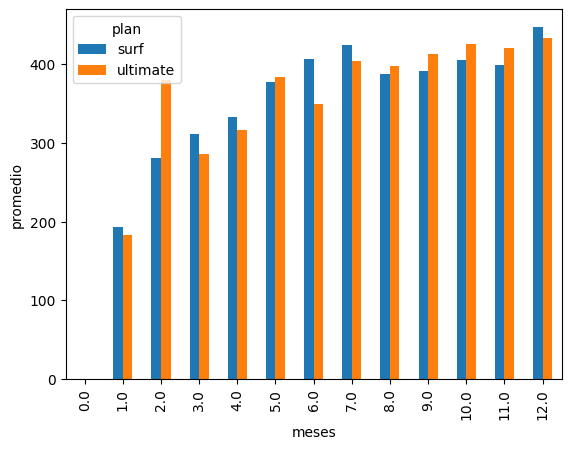

In [39]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_llamadas = fusion_with_plan_details.groupby(['month','plan'])['minutes_sum'].mean().reset_index()
duracion_pivot = duracion_llamadas.pivot(index='month', columns='plan', values='minutes_sum')
duracion_pivot.plot(kind='bar', xlabel='meses', ylabel='promedio')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes
</div>


In [40]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutos_max_surf = fusion_with_plan_details.query('plan == "surf"')['minutes_sum'].max()
minutos_max_surf

1431.2199999999996

In [41]:
minutos_min_surf = fusion_with_plan_details.query('plan == "surf"')['minutes_sum'].min()
minutos_min_surf 

0.0

In [42]:
minutos_max_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['minutes_sum'].max()
minutos_max_ultimate

1292.09

In [43]:
minutos_min_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['minutes_sum'].min()
minutos_min_ultimate

0.0

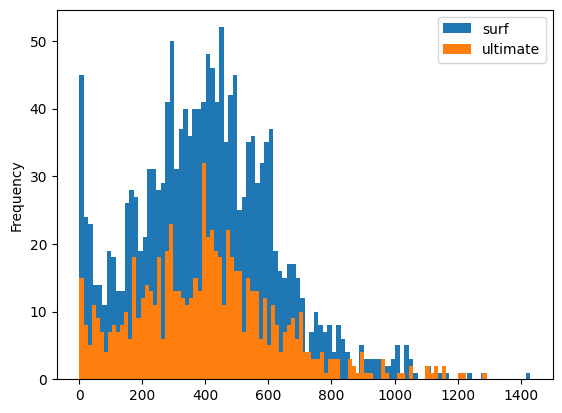

In [44]:
planes = ['surf','ultimate']
for plan in planes:
    fusion_with_plan_details[fusion_with_plan_details['plan'] == plan]['minutes_sum'].dropna().plot(kind = 'hist', bins = 100)
plt.legend(planes)

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [45]:
# Calcula la media y la varianza de la duración mensual de llamadas.
promedio_duracion = fusion_with_plan_details.groupby(['plan','month'])['minutes_sum'].sum()
promedio_duracion

plan      month
surf      0.0           0.00
          1.0         385.68
          2.0        2527.66
          3.0        7152.31
          4.0       16619.00
          5.0       29033.10
          6.0       39499.26
          7.0       51367.31
          8.0       62721.48
          9.0       75852.46
          10.0      96149.09
          11.0     113086.75
          12.0     142297.14
ultimate  0.0           0.00
          1.0         732.65
          2.0        2659.03
          3.0        3428.42
          4.0        6646.67
          5.0       11126.28
          6.0       16441.12
          7.0       23822.27
          8.0       28206.51
          9.0       35542.71
          10.0      45067.81
          11.0      53400.65
          12.0      65384.90
Name: minutes_sum, dtype: float64

In [46]:
varianza_duracion = fusion_with_plan_details.groupby(['plan','month'])['minutes_sum'].var()
varianza_duracion

plan      month
surf      0.0          0.000000
          1.0      14795.440200
          2.0      46959.219961
          3.0      31821.317991
          4.0      45615.666796
          5.0      53282.922217
          6.0      40758.661193
          7.0      54434.184064
          8.0      48616.061790
          9.0      41580.494645
          10.0     46731.430317
          11.0     46105.085924
          12.0     56983.247423
ultimate  0.0          0.000000
          1.0      14991.369958
          2.0      68540.288348
          3.0      54273.917252
          4.0      31057.727496
          5.0      39290.610940
          6.0      37923.360514
          7.0      64844.426958
          8.0      47680.189425
          9.0      50994.505514
          10.0     48371.222127
          11.0     54265.152604
          12.0     55781.717507
Name: minutes_sum, dtype: float64

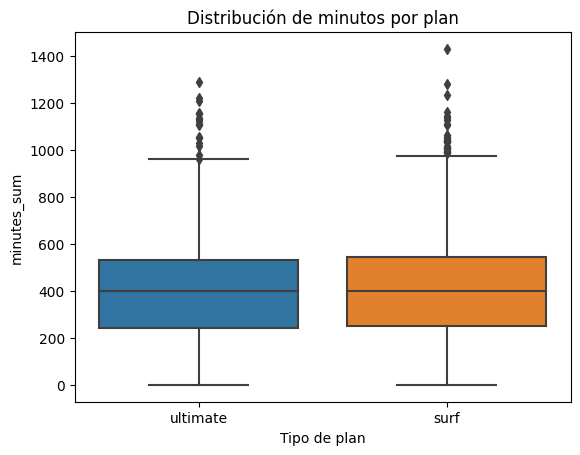

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data = fusion_with_plan_details, x = 'plan', y= 'minutes_sum')
plt.ylabel= ('total de minutos')
plt.xlabel('Tipo de plan')
plt.title('Distribución de minutos por plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los diagramas de caja nos permiten ver la distribución de ambos conjuntos de datos de una manera clara

</div>


El promedio de las llamadas de ultimate es mas alto, a excepción del mes 7 y 12 el promedio de las llamadas es mas alto en surf, se ve un sesgo a la derecha, en el histograma podemos ver que los usuarios surf tienen mas dispersión más extendida al rededor de 300 y 600 y los usuarios ultimate entre 100 y 500, en el diagrama de cajas y bigotes podemos ver que el promedio esta en 400, el primer cuartil es al rededor de 250 y el tercer cuartil esta en más de 980, aun que surf mantiene valores mas atipicos, podemos decir que surf al ser mas barato tiende a tener mas recargos que ultimate. 

### Mensajes

<AxesSubplot:title={'center':'cantidad mensajes por mes'}, xlabel='meses', ylabel='promedio'>

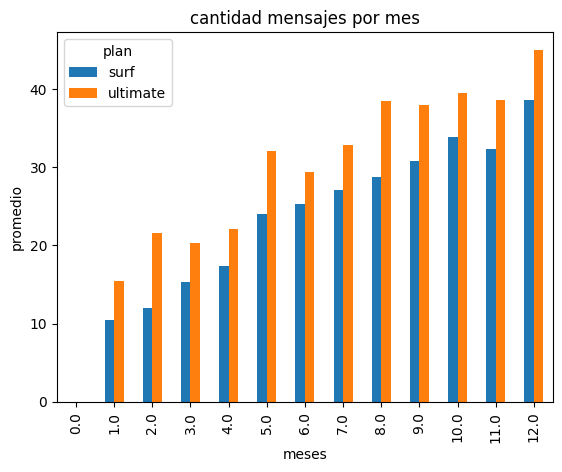

In [48]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
cantidad_mensajes = fusion_with_plan_details.groupby(['month','plan'])['message_counts'].mean().reset_index()
mensajes_pivot = cantidad_mensajes.pivot(index='month', columns='plan', values='message_counts')
mensajes_pivot.plot(title= 'cantidad mensajes por mes', kind='bar', xlabel='meses', ylabel='promedio')


In [49]:
mensajes_max_surf = fusion_with_plan_details.query('plan == "surf"')['message_counts'].max()
mensajes_max_surf

266.0

In [50]:
mensajes_min_surf = fusion_with_plan_details.query('plan == "surf"')['message_counts'].min()
mensajes_min_surf

0.0

In [51]:
mensajes_max_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['message_counts'].max()
mensajes_max_ultimate

166.0

In [52]:
mensajes_min_ultimate = fusion_with_plan_details.query('plan == "surf"')['message_counts'].min()
mensajes_min_ultimate

0.0

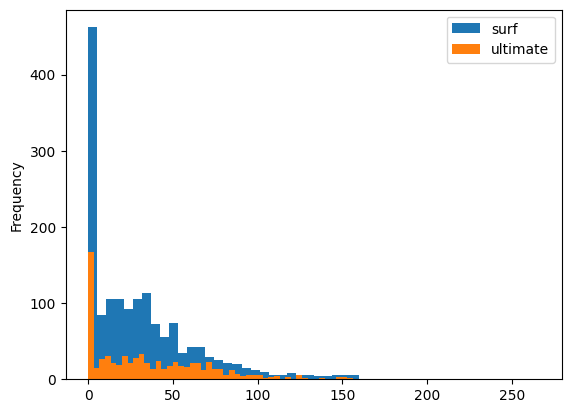

In [53]:
planes = ['surf','ultimate']
for plan in planes:
    fusion_with_plan_details[fusion_with_plan_details['plan'] == plan]['message_counts'].dropna().plot(kind = 'hist', bins = 50)
plt.legend(planes)

In [54]:
promedio_mensajes = fusion_with_plan_details.groupby(['plan','month'])['message_counts'].sum()
promedio_mensajes

plan      month
surf      0.0          0.0
          1.0         21.0
          2.0        108.0
          3.0        351.0
          4.0        870.0
          5.0       1849.0
          6.0       2454.0
          7.0       3271.0
          8.0       4662.0
          9.0       5968.0
          10.0      8020.0
          11.0      9165.0
          12.0     12275.0
ultimate  0.0          0.0
          1.0         62.0
          2.0        151.0
          3.0        243.0
          4.0        463.0
          5.0        931.0
          6.0       1379.0
          7.0       1937.0
          8.0       2732.0
          9.0       3259.0
          10.0      4181.0
          11.0      4903.0
          12.0      6796.0
Name: message_counts, dtype: float64

In [55]:
varianza_mensajes = fusion_with_plan_details.groupby(['plan','month'])['minutes_sum'].var()
varianza_mensajes

plan      month
surf      0.0          0.000000
          1.0      14795.440200
          2.0      46959.219961
          3.0      31821.317991
          4.0      45615.666796
          5.0      53282.922217
          6.0      40758.661193
          7.0      54434.184064
          8.0      48616.061790
          9.0      41580.494645
          10.0     46731.430317
          11.0     46105.085924
          12.0     56983.247423
ultimate  0.0          0.000000
          1.0      14991.369958
          2.0      68540.288348
          3.0      54273.917252
          4.0      31057.727496
          5.0      39290.610940
          6.0      37923.360514
          7.0      64844.426958
          8.0      47680.189425
          9.0      50994.505514
          10.0     48371.222127
          11.0     54265.152604
          12.0     55781.717507
Name: minutes_sum, dtype: float64

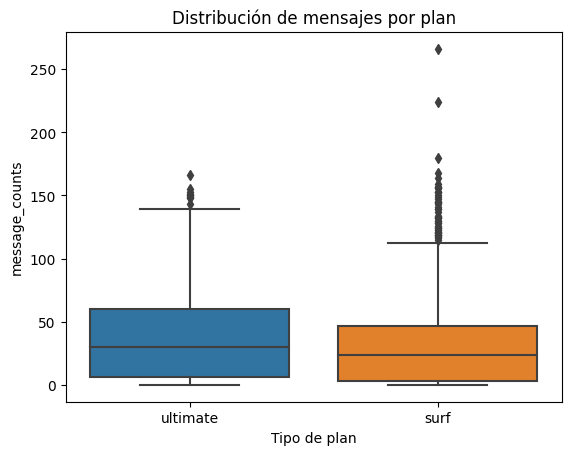

In [56]:
sns.boxplot(data = fusion_with_plan_details, x = 'plan', y= 'message_counts')
plt.ylabel= ('promedio de mensajes')
plt.xlabel('Tipo de plan')
plt.title('Distribución de mensajes por plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buenas observaciones, buena manera de pensar en como se pueden aplicar estos conocimientos a casos útiles y reales
</div>


se puede deducir que se escriben mas mensajes en los últimos días del año, pero se puede ver que casí siempre se escribe el plan ultimate, el histograma es de sesgo positivo, la mayoría de los valores son cercanos a 0, se puede ver que la mayoría de los mensajes estan debajo de 100 hasta 250, sin embargo surf domina las frecuencias bajas, el promedio de los mensajes en menor de 40 en ultimate, en cambio en surf el promedio aún es mas bajo como 35, sin embargo se puede ver que en ambos planes la gente escribe pocos mensajes. 

### Internet

<AxesSubplot:title={'center':'cantidad de internet consumido'}, xlabel='meses', ylabel='promedio'>

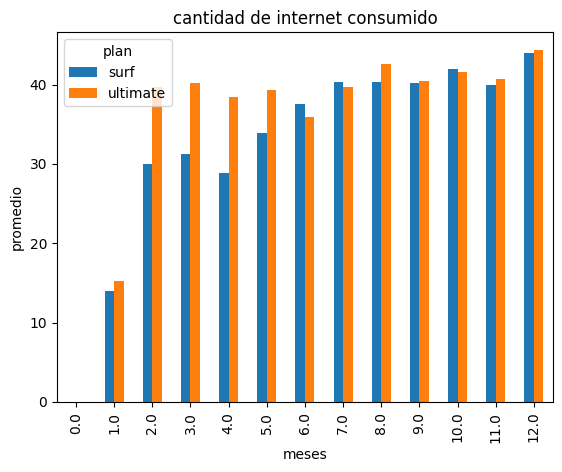

In [57]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_promedio = fusion_with_plan_details.groupby(['month','plan'])['internet_consum'].mean().reset_index()
internet_pivot = internet_promedio.pivot(index='month', columns='plan', values='internet_consum')
internet_pivot.plot(title= 'cantidad de internet consumido', kind='bar', xlabel='meses', ylabel='promedio')

In [58]:
internet_max_surf = fusion_with_plan_details.query('plan == "surf"')['internet_consum'].max()
internet_max_surf

132.0

In [59]:
internet_min_surf = fusion_with_plan_details.query('plan == "surf"')['internet_consum'].min()
internet_min_surf

0.0

In [60]:
internet_max_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['internet_consum'].max()
internet_max_ultimate

96.0

In [61]:
internet_min_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['internet_consum'].min()
internet_min_ultimate

0.0

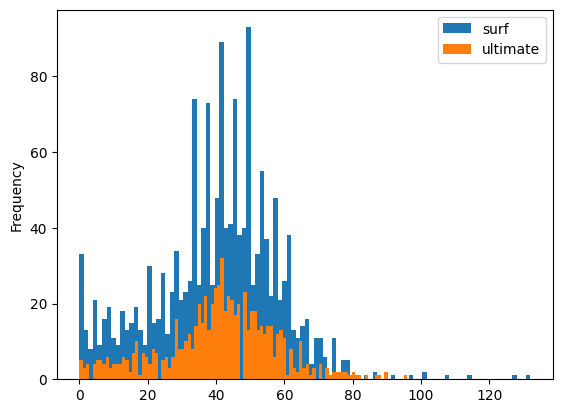

In [62]:
planes = ['surf','ultimate']
for plan in planes:
    fusion_with_plan_details[fusion_with_plan_details['plan'] == plan]['internet_consum'].dropna().plot(kind = 'hist', bins = 100)
plt.legend(planes)

In [63]:
internet_duracion = fusion_with_plan_details.groupby(['plan','month'])['internet_consum'].mean()
internet_duracion

plan      month
surf      0.0       0.000000
          1.0      14.000000
          2.0      30.000000
          3.0      31.260870
          4.0      28.880000
          5.0      33.844156
          6.0      37.515464
          7.0      40.264463
          8.0      40.277778
          9.0      40.221649
          10.0     41.987342
          11.0     39.957597
          12.0     43.949686
ultimate  0.0       0.000000
          1.0      15.250000
          2.0      39.714286
          3.0      40.250000
          4.0      38.428571
          5.0      39.310345
          6.0      35.851064
          7.0      39.644068
          8.0      42.619718
          9.0      40.465116
          10.0     41.556604
          11.0     40.732283
          12.0     44.377483
Name: internet_consum, dtype: float64

In [64]:
varianza_internet = fusion_with_plan_details.groupby(['plan','month'])['internet_consum'].var()
varianza_internet

plan      month
surf      0.0        0.000000
          1.0       98.000000
          2.0      290.500000
          3.0      348.474308
          4.0      324.352653
          5.0      318.001709
          6.0      250.585696
          7.0      306.862810
          8.0      371.270186
          9.0      257.292586
          10.0     304.419331
          11.0     288.480465
          12.0     338.035315
ultimate  0.0        0.000000
          1.0       68.916667
          2.0      293.238095
          3.0      656.022727
          4.0      409.957143
          5.0      242.793103
          6.0      297.781684
          7.0      324.474576
          8.0      247.239034
          9.0      205.334063
          10.0     225.830099
          11.0     255.022997
          12.0     286.063223
Name: internet_consum, dtype: float64

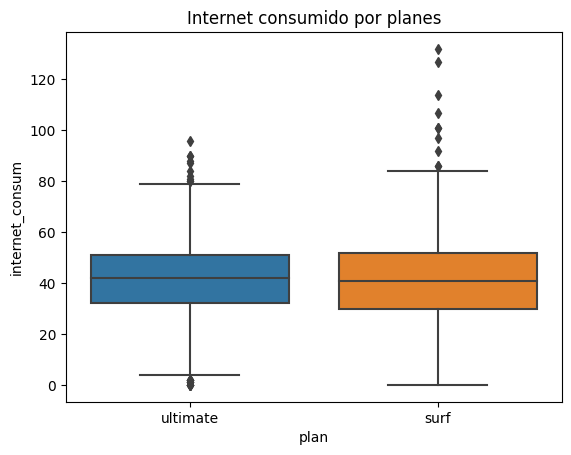

In [65]:
sns.boxplot(data = fusion_with_plan_details, x = 'plan', y= 'internet_consum')
plt.title('Internet consumido por planes')
plt.show()

se puede ver que el plan ultimate consume mas internet que surf, sin embargo se puede ver que el consumo aumenta un poco más en diciembre, en el caso del histograma se puedever un sesgo positivo, la mayoría de las frecuencias de surf están entre 30 y 60 gb, en el caso de ultimate es entre 20 y 50, en el caso se puede observar que la mayoría cconsumen mas de 40 en promedio en internet, sin emabargo la mayoría de los valores atípicos los tiene surf,

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<AxesSubplot:xlabel='meses', ylabel='promedio'>

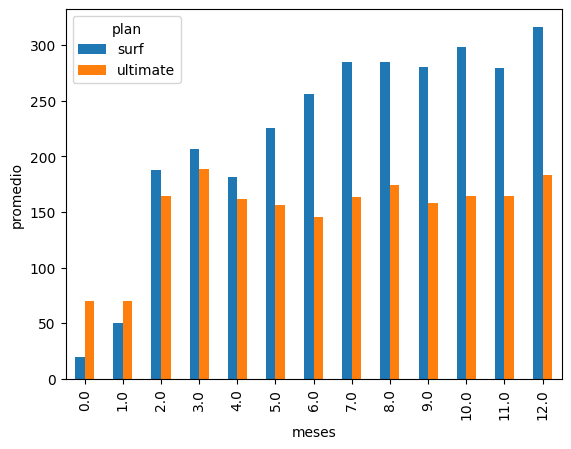

In [66]:
ingresos_totales = fusion_with_plan_details.groupby(['month','plan'])['cargo_total'].mean().reset_index()
ingresos_pivot = ingresos_totales.pivot(index='month', columns='plan', values='cargo_total')
ingresos_pivot.plot(kind='bar', xlabel='meses', ylabel='promedio')

In [67]:
ingresos_max_surf = fusion_with_plan_details.query('plan == "surf"')['cargo_total'].max()
ingresos_max_surf

1208.6372

In [68]:
ingresos_min_surf = fusion_with_plan_details.query('plan == "surf"')['cargo_total'].min()
ingresos_min_surf

20.0

In [69]:
minutos_max_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['cargo_total'].max()
minutos_max_ultimate

532.0

In [70]:
minutos_min_ultimate = fusion_with_plan_details.query('plan == "ultimate"')['cargo_total'].min()
minutos_min_ultimate

70.0

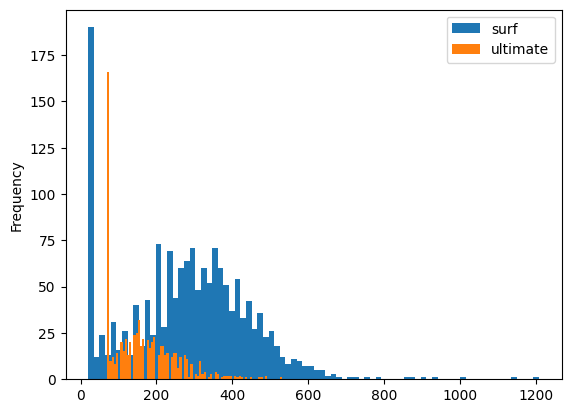

In [71]:
planes = ['surf','ultimate']
for plan in planes:
    fusion_with_plan_details[fusion_with_plan_details['plan'] == plan]['cargo_total'].dropna().plot(kind = 'hist', bins = 80)
plt.legend(planes)

In [72]:
ingresos_promedio = fusion_with_plan_details.groupby(['plan','month'])['cargo_total'].mean()
ingresos_promedio

plan      month
surf      0.0       20.000000
          1.0       50.000000
          2.0      187.590067
          3.0      206.659826
          4.0      181.654700
          5.0      225.416973
          6.0      256.044137
          7.0      284.783926
          8.0      285.115772
          9.0      279.958849
          10.0     298.380043
          11.0     279.395598
          12.0     316.391996
ultimate  0.0       70.000000
          1.0       70.000000
          2.0      164.000000
          3.0      189.000000
          4.0      161.333333
          5.0      156.655172
          6.0      145.510638
          7.0      163.254237
          8.0      174.605634
          9.0      157.825581
          10.0     164.235849
          11.0     164.031496
          12.0     183.205298
Name: cargo_total, dtype: float64

In [73]:
ingresos_varianza = fusion_with_plan_details.groupby(['plan','month'])['cargo_total'].var()
ingresos_varianza

plan      month
surf      0.0          0.000000
          1.0       1800.000000
          2.0      20664.599508
          3.0      23838.149428
          4.0      23473.346000
          5.0      24194.406341
          6.0      19681.170450
          7.0      24486.203962
          8.0      30454.260531
          9.0      21814.660066
          10.0     26076.094220
          11.0     23789.030800
          12.0     30838.134216
ultimate  0.0          0.000000
          1.0          0.000000
          2.0       6106.333333
          3.0      15849.272727
          4.0      11002.833333
          5.0       5370.448276
          6.0       5434.603145
          7.0       7894.813559
          8.0       6885.042254
          9.0       6225.486867
          10.0      7071.096226
          11.0      6769.459318
          12.0      9757.377572
Name: cargo_total, dtype: float64

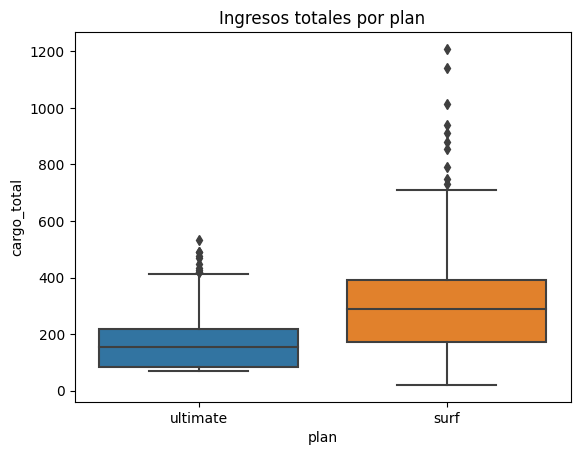

In [74]:
sns.boxplot(data = fusion_with_plan_details , x = 'plan', y= 'cargo_total') 
plt.title('Ingresos totales por plan')
plt.show()

Se puede observar que los ingresos del plan surf son mayores e incrementan con el paso de los meses, en cambio los de ultimate son mayores desde el mes 2 al tres, en el histograma se puede ver que la mayoría de los valores son cercanos a 0 lo que explica un sesgo positivo, la mayoría de las frecuencias están en 0, y en el caso de ultimate estan en 50, en el caso del diagrama de caja se puede ver que el promedio es 300 en el caso de surf y menos de 200 en el caso de ultimate, sin embargo surf tiene mas valores atipicos, podría conluir que aun que surf es mas barato que ultimate este tiene a tener ingresos mayores ya que la gente tiende a sobrepasarse de su límite. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

# Prueba las hipótesis
H0 los valores no hay diferencia significativa de los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf
H1 Hay una diferencia significativa entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

In [75]:
surf = fusion_with_plan_details.query("plan == 'surf'")['cargo_total'].dropna()
ultimate = fusion_with_plan_details.query("plan == 'ultimate'")['cargo_total'].dropna()

alpha = 0.05
results= st.ttest_ind(surf, ultimate, equal_var=False)

print('valor:p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor:p: 3.0404295907247385e-96
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [76]:
tabla_final = fusion_with_plan_details[fusion_with_plan_details['city'].str.contains('NY-NJ')]
tabla_final
cargo_total = tabla_final['cargo_total']
cargo_total
tabla_final_contraria = fusion_with_plan_details[~fusion_with_plan_details['city'].str.contains('NY-NJ')]
tabla_final_contraria
cargo_total_contraria = tabla_final_contraria['cargo_total']
cargo_total_contraria

0        70.00
1        80.00
2       280.00
3       370.09
4       360.00
         ...  
2298     20.00
2299     20.00
2300     20.00
2301     70.00
2302     20.00
Name: cargo_total, Length: 1925, dtype: float64

In [77]:
# Prueba las hipótesis
cargo_total
cargo_total_contraria

alpha = 0.05
results = st.ttest_ind(cargo_total, cargo_total_contraria, equal_var=False)

print ('valor:p:', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor:p: 0.003973809517577111
Rechazamos la hipótesis nula


en ambas hipótesis se puede observar que se rechaza la hipotesis es decir que en ambos casos los cambios si son evidentes ya sea entre ambos planes y en las diferentes regiones. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

Este proyecto nos demuestra la importancia, la limpieza de datos, el filtrado y la creación de un dataframe con la unión de más data frames, para que despues puedan ser analizados con gráficos y aplicarse a una prueba de hipotesis. 
Se puede observar que surf es un plan mas economico pero que tiende a tener mayores excesos pues los valores atipicos, así como las frecuencias de sus usos son mayores, en contraste ultimate es mas caro, pero sus usuarios tienden a pasarse menos, ya que su paquete incluye mayor cantidad de mensajes, llamadas, etc. por lo tanto el plan surf genera mayores ganacias debido a los e

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>
